In [1]:
# ======================================================
# CELL 1: KẾT NỐI GOOGLE DRIVE
# ======================================================
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ======================================================
# CELL 2: CẤU HÌNH ĐƯỜNG DẪN (FINAL STRUCTURE)
# ======================================================
import os

# 1. Thư mục gốc
BASE_PATH = "/content/drive/MyDrive/Project_HateSpeech"

# 2. Định nghĩa các thư mục con
DIR_DATA      = f"{BASE_PATH}/dataset"
DIR_KEYWORD   = f"{BASE_PATH}/keyword"
DIR_EMBEDDING = f"{BASE_PATH}/Embedding&Model/embedding"
DIR_MODEL     = f"{BASE_PATH}/Embedding&Model/model"
DIR_CONFIG    = f"{BASE_PATH}/config"

# Tự động tạo thư mục (nếu chưa có)
for path in [DIR_DATA, DIR_KEYWORD, DIR_EMBEDDING, DIR_MODEL, DIR_CONFIG]:
    os.makedirs(path, exist_ok=True)

# 3. Đường dẫn chi tiết tới từng file
# --- Nhóm Dữ liệu ---
DATASET_FILE     = f"{DIR_DATA}/dataset.csv"

# --- Nhóm Tài nguyên ---
KEYWORDS_FILE    = f"{DIR_KEYWORD}/keywords.json"
WHITELIST_FILE   = f"{DIR_KEYWORD}/whitelist.json"

# --- Nhóm Vector hóa ---
EMBEDDING_FILE   = f"{DIR_EMBEDDING}/cc.vi.300.vec"

# --- Nhóm Model ---
MODEL_FILE       = f"{DIR_MODEL}/hate_speech_model.keras"
TOKENIZER_FILE   = f"{DIR_MODEL}/tokenizer.pickle"

# --- Nhóm Cấu hình ---
NGROK_TOKEN_FILE = f"{DIR_CONFIG}/ngrok_token.txt"

# 4. Tham số Model
MAX_WORDS = 20000
MAX_LEN   = 100
EMBED_DIM = 300

print(f"✅ Đã cập nhật cấu trúc thư mục hoàn chỉnh!")
print(f"📂 Dataset: {DIR_DATA}")
print(f"📂 Keyword:  {DIR_KEYWORD}")
print(f"📂 Embedding:  {DIR_EMBEDDING}")
print(f"📂 Model:  {DIR_MODEL}")
print(f"📂 Config:  {DIR_CONFIG}")

✅ Đã cập nhật cấu trúc thư mục hoàn chỉnh!
📂 Dataset: /content/drive/MyDrive/Project_HateSpeech/dataset
📂 Keyword:  /content/drive/MyDrive/Project_HateSpeech/keyword
📂 Embedding:  /content/drive/MyDrive/Project_HateSpeech/Embedding&Model/embedding
📂 Model:  /content/drive/MyDrive/Project_HateSpeech/Embedding&Model/model
📂 Config:  /content/drive/MyDrive/Project_HateSpeech/config


In [3]:
import json

# ======================================================
# CELL 3: TẠO FILE TEENCODE (JSON)
# ======================================================
teencode_dict = {
    "ctrai": "con trai",
    "khôg": "không",
    "cskh": "chăm sóc khách hàng",
    "bme": "bố mẹ",
    "cta": "chúng ta",
    "mih": "mình",
    "mqh": "mối quan hệ",
    "cgai": "con gái",
    "nhữg": "những",
    "mng": "mọi người",
    "svtn": "sinh viên tình nguyện",
    "r": "rồi",
    "th": "thôi",
    "pác": "bác",
    "qtam": "quan tâm",
    "thươg": "thương",
    "qtâm": "quan tâm",
    "chug": "chung",
    "trườg": "trường",
    "thoy": "thôi",
    "vailoz": "vãi lồn",
    "đki": "đăng ký",
    "clb": "câu lạc bộ",
    "app": "phần mềm",
    "éo": "đéo",
    "db": "đầu buồi",
    "atsm": "ảo tưởng sức mạnh",
    "ạk": "ạ",
    "dell": "đéo",
    "thg": "thằng",
    "nma": "nhưng mà",
    "nhma": "nhưng mà",
    "edit": "chỉnh sửa",
    "cv": "công việc",
    "vch": "vãi chưởng",
    "cùg": "cùng",
    "pn": "bạn",
    "z": "vậy",
    "v": "vậy",
    "zzz": "ngủ",
    "pjt": "biết",
    "thjk": "thích",
    "keke": "cười",
    "ktra": "kiểm tra",
    "ktx": "ký túc xá",
    "nek": "nè",
    "cgái": "con gái",
    "nthe": "như thế",
    "chúg": "chúng",
    "kái": "cái",
    "tìh": "tình",
    "phòg": "phòng",
    "lòg": "lòng",
    "từg": "từng",
    "rằg": "rằng",
    "sốg": "sống",
    "thuj": "thôi",
    "thuơng": "thương",
    "càg": "càng",
    "đky": "đăng ký",
    "bằg": "bằng",
    "sviên": "sinh viên",
    "viral": "nổi tiếng",
    "mxh": "mạng xã hội",
    "ák": "á",
    "mm": "mẹ mày",
    "đág": "đáng",
    "nvay": "như vậy",
    "nhjeu": "nhiều",
    "xg": "xuống",
    "zồi": "rồi",
    "trag": "trang",
    "zữ": "dữ",
    "atrai": "anh trai",
    "kte": "kinh tế",
    "độg": "động",
    "lmht": "liên minh huyền thoại",
    "gắg": "gắng",
    "đzai": "đẹp trai",
    "thgian": "thời gian",
    "plz": "làm ơn",
    "đồg": "đồng",
    "btrai": "bạn trai",
    "nthê": "như thế",
    "vl": "vãi lồn",
    "hìhì": "cười",
    "vọg": "vọng",
    "hihe": "cười",
    "đôg": "đông",
    "răg": "răng",
    "thườg": "thường",
    "tcảm": "tình cảm",
    "đứg": "đứng",
    "ksao": "không sao",
    "dz": "đẹp trai",
    "hjxhjx": "hix hix",
    "cmày": "chúng mày",
    "xuốg": "xuống",
    "nkư": "như",
    "lquan": "liên quan",
    "lqmb": "liên quân mobile",
    "mlbb": "mobile legend bang bang",
    "tiếg": "tiếng",
    "hajz": "haizz",
    "đb": "đầu buồi",
    "cjv": "cái gì vậy",
    "ccjv": "con cặc gì vậy",
    "xih": "xinh",
    "hìh": "hình",
    "thàh": "thành",
    "ngke": "nghe",
    "dzậy": "dậy",
    "teencode": "tin cốt",
    "tnào": "thế nào",
    "tưởg": "tưởng",
    "ctrinh": "chương trình",
    "phog": "phong",
    "hôg": "không",
    "zìa": "gì",
    "kũg": "cũng",
    "ntnao": "như thế nào",
    "trọg": "trọng",
    "nthế": "như thế",
    "năg": "năng",
    "ngđó": "người đó",
    "lquen": "làm quen",
    "riêg": "riêng",
    "ngag": "ngang",
    "hêhê": "cười",
    "hỉu": "hiểu",
    "bnhiu": "bao nhiêu",
    "ngốk": "ngốc",
    "kậu": "cậu",
    "highland": "quán cà phê",
    "hlv": "huấn luyện viên",
    "kqua": "kết quả",
    "htrc": "hôm trước",
    "địh": "định",
    "gđình": "gia đình",
    "giốg": "giống",
    "csống": "cuộc sống",
    "cuti": "dễ thương",
    "cute": "dễ thương",
    "xug": "xung",
    "zùi": "rồi",
    "bnhiêu": "bao nhiêu",
    "cbị": "chuẩn bị",
    "kòn": "còn",
    "buôg": "buông",
    "bulul": "bú lồn",
    "csong": "cuộc sống",
    "solo": "một mình",
    "1v1": "đối đầu",
    "1vs1": "đối đầu",
    "chàg": "chàng",
    "chăg": "chăng",
    "ngàh": "ngành",
    "llac": "liên lạc",
    "nkưng": "nhưng", "nắg": "nắng", "tíh": "tính",
    "khoảg": "khoảng", "thík": "thích", "ngđo": "người đó",
    "ngkhác": "người khác", "thẳg": "thẳng", "kảm": "cảm",
    "dàh": "dành", "júp": "giúp", "lặg": "lặng",
    "vđê": "vấn đề", "bbè": "bạn bè", "bóg": "bóng",
    "dky": "đăng ký", "dòg": "dòng", "uốg": "uống",
    "tyêu": "tình yêu", "snvv": "sinh nhật vui vẻ", "đthoại": "điện thoại",
    "qhe": "quan hệ", "cviec": "công việc", "tượg": "tượng",
    "qà": "quà", "thjc": "thích", "nhưq": "nhưng",
    "cđời": "cuộc đời", "bthường": "bình thường", "zà": "già",
    "đáh": "đánh", "xloi": "xin lỗi", "zám": "dám",
    "qtrọng": "quan trọng", "bìh": "bình", "lzi": "làm gì",
    "qhệ": "quan hệ", "đhbkhn": "đại học bách khoa hà nội", "hajzz": "haizz",
    "kủa": "của", "đhkhtn": "đại học khoa học tự nhiên",
    "đh": "đại học", "đóg": "đóng", "cka": "cha", "mún": "muốn",
    "lgi": "làm gì", "nvậy": "như vậy", "qả": "quả",
    "đkiện": "điều kiện", "nèk": "nè", "tlai": "tương lai",
    "bsĩ": "bác sĩ", "hkì": "học kỳ", "đcsvn": "đảng cộng sản việt nam",
    "vde": "vấn đề", "chta": "chúng ta", "òy": "rồi",
    "ltinh": "linh tinh", "ngyeu": "người yêu", "đthoai": "điện thoại",
    "snghĩ": "suy nghĩ", "nặg": "nặng", "họk": "học",
    "dừg": "dừng", "hphúc": "hạnh phúc", "hiha": "cười",
    "wtâm": "quan tâm", "thíck": "thích", "chuện": "chuyện",
    "lạh": "lạnh", "fây": "facebook", "ntnày": "như thế này",
    "lúk": "lúc", "haj": "hai", "ngía": "nghía",
    "mớj": "mới", "hsơ": "hồ sơ", "ctraj": "con trai",
    "trg": "trường", "nyêu": "người yêu", "điiiiiii": "đi",
    "rồii": "rồi", "cj": "chị", "c": "cặc",
    "kih": "kinh", "kb": "kết bạn", "hixxx": "hix",
    "dthương": "dễ thương", "nhiềuuu": "nhiều", "ctrình": "chương trình",
    "mìnk": "mình", "mjh": "mình", "ng": "người",
    "vc": "vợ chồng", "uhm": "ừm", "thỳ": "thì",
    "nyc": "người yêu cũ", "tks": "cảm ơn", "nàg": "nàng",
    "thôii": "thôi", "đjên": "điên", "bgái": "bạn gái",
    "vớii": "với", "xink": "xinh", "hđộng": "hành động",
    "đhọc": "đại học", "mk": "mình", "bn": "bạn",
    "thik": "thích", "mn": "mọi người", "nguoi": "người",
    "nógn": "nóng", "hok": "không", "ko": "không",
    "bik": "biết", "vs": "với", "cx": "cũng",
    "mik": "mình", "wtf": "cái quái gì", "đc": "được",
    "cmt": "bình luận", "ck": "chồng", "chk": "chồng",
    "ngta": "người ta", "gđ": "gia đình", "oh": "ồ",
    "vk": "vợ", "ctác": "công tác", "sg": "sài gòn",
    "ae": "anh em", "ah": "à", "ạh": "ạ",
    "rì": "gì", "ms": "mới", "vn": "việt nam",
    "nhaa": "nha", "cũg": "cũng", "đag": "đang",
    "ơiii": "ơi", "hic": "hix", "ace": "anh chị em",
    "àk": "à", "uh": "ừ", "cmm": "con mẹ mày",
    "cmnr": "con mẹ nó rồi", "ơiiii": "ơi", "hnay": "hôm nay",
    "ukm": "ừm", "tq": "trung quốc", "ctr": "chương trình",
    "đii": "đi", "nch": "nói chuyện", "trieu": "triệu",
    "hahah": "cười", "nta": "người ta", "ngèo": "nghèo",
    "kêh": "kênh", "ak": "à", "ad": "admin",
    "dme": "địt mẹ", "djt": "địt", "add fr": "thêm bạn",
    "j": "gì", "ny": "người yêu", "dc": "được",
    "qc": "quảng cáo", "baoh": "bao giờ", "zui": "vui",
    "zẻ": "vẻ", "tym": "tim", "aye": "anh yêu em",
    "eya": "em yêu anh", "fb": "facebook", "insta": "instagram",
    "z": "vậy", "thich": "thích", "vcl": "vãi cả lồn",
    "đt": "điện thoại", "acc": "tài khoản", "ccho": "con chó",
    "choei": "chơi", "l": "lồn", "loz": "lồn",
    "lozz": "lồn", "trc": "trước", "chs": "chẳng hiểu sao",
    "đhs": "đéo hiểu sao", "qá": "quá", "ntn": "như thế nào",
    "wá": "quá", "zậy": "vậy", "zô": "vô",
    "ytb": "youtube", "vđ": "vãi đái", "vchg": "vãi chưởng",
    "sml": "sấp mặt lờ", "mlem": "ngon", "xl": "xin lỗi",
    "cmn": "con mẹ nó", "face": "facebook", "hjhj": "cười",
    "vv": "vui vẻ", "ns": "nói", "iu": "yêu",
    "vcđ": "vãi cả đái", "in4": "thông tin", "qq": "quần què",
    "sub": "theo dõi", "kh": "không", "zạ": "vậy",
    "oy": "rồi", "jo": "giờ", "clmm": "cái lồn mẹ mày",
    "clgt": "cái lồn gì thế", "bsvv": "buổi sáng vui vẻ",
    "troai": "trai", "wa": "quá", "hjx": "hix",
    "e": "em", "ik": "đi", "ji": "gì",
    "ce": "chị em", "lm": "làm", "đz": "đẹp trai",
    "sr": "xin lỗi", "ib": "inbox", "hoy": "thôi",
    "đbh": "đéo bao giờ", "k": "không", "vd": "ví dụ",
    "a": "anh", "cũng z": "cũng vậy", "z là": "vậy là",
    "unf": "hủy kết bạn", "my fen": "bạn tôi", "fen": "bạn",
    "cty": "công ty", "on lai": "online", "u hai ba": "u23",
    "ai ô si ma": "hài", "kô": "không", "đtqg": "đội tuyển quốc gia",
    "hqua": "hôm qua", "xog": "xong", "uk": "ừ",
    "nhoé": "nhé", "biet": "biết", "quí": "quý",
    "stk": "số tài khoản", "hong kong": "hồng kông", "đươc": "được",
    "nghành": "ngành", "nvqs": "nghĩa vụ quân sự", "ngừoi": "người",
    "trog": "trong", "tgian": "thời gian", "biêt": "biết",
    "fải": "phải", "nguời": "người", "tđn": "thế đéo nào",
    "bth": "bình thường", "tgdd": "thế giới di động", "khg": "không",
    "nhưg": "nhưng", "thpt": "trung học phổ thông", "thằg": "thằng",
    "đuợc": "được", "dcu": "địt cụ", "àh": "à",
    "ku": "cu", "thým": "thím", "onl": "online",
    "zô": "dô", "zú": "vú", "cmnd": "chứng minh nhân dân",
    "sđt": "số điện thoại", "klq": "không liên quan", "ok": "được",
    "m": "mày", "view": "cảnh", "now": "bây giờ", "ngok": "ngốc",
    "set": "đặt", "nv": "nhân viên", "cheese": "phô mai",
    "t": "tao", "size": "kích thước", "decor": "trang trí",
    "nc": "nước", "free": "miễn phí", "h": "giờ",
    "thui": "thôi", "hn": "hà nội", "socola": "sô cô la",
    "bt": "bình thường", "oke": "được", "nhg": "nhưng",
    "recommend": "gợi ý", "shipper": "giao hàng", "best": "tốt",
    "check": "kiểm tra", "hot": "nổi bật", "full": "đầy",
    "sale": "giảm giá", "mix": "kết hợp", "ord": "đặt hàng",
    "tui": "tôi", "voucher": "mã giảm giá", "thứ n": "thứ nhiều",
    "note": "ghi chú", "nice": "tốt", "đ": "đéo",
    "nchung": "nói chung", "vote": "đánh giá", "ncl": "nói chung là",
    "good": "tốt", "nh": "nhưng", "b": "bạn",
    "nvien": "nhân viên", "up": "đăng", "bill": "hóa đơn",
    "bltm": "bông lan trứng muối", "fact": "sự thật", "cf": "cà phê",
    "lôn`": "lồn", "bthg": "bình thường", "toẹt": "tuyệt",
    "thk": "thích", "dag": "đang", "delete": "xóa",
    "ss": "samsung", "xau": "xấu", "dep": "đẹp",
    "ngoo": "ngu"
}

# 3. Lưu file
file_path = f"{DIR_KEYWORD}/teencode.json"
with open(file_path, 'w', encoding='utf-8') as f:
    # indent=4 giúp format đẹp (mỗi dòng 1 cặp)
    # ensure_ascii=False giúp hiển thị tiếng Việt không bị lỗi \u...
    json.dump(teencode_dict, f, ensure_ascii=False, indent=4)
TEENCODE_FILE    = f"{DIR_KEYWORD}/teencode.json"
print(f"✅ Đã lưu file teencode.json thành công tại: {file_path}")

✅ Đã lưu file teencode.json thành công tại: /content/drive/MyDrive/Project_HateSpeech/keyword/teencode.json


In [4]:
# ======================================================
# CELL 4: IMPORT THƯ VIỆN & KIỂM TRA HỆ THỐNG
# ======================================================
!pip install pyngrok flask emoji requests

# 1. Các thư viện xử lý dữ liệu cơ bản
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import pickle
import re
import requests
import joblib

# 2. Các thư viện Deep Learning (TensorFlow/Keras)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, SpatialDropout1D, GlobalMaxPooling1D, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from pyngrok import ngrok
from flask import Flask, request, render_template_string, jsonify, session, redirect, url_for

# 3. Cấu hình giao diện biểu đồ
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 4. Kiểm tra sự tồn tại của các file quan trọng
# (Sử dụng các biến đường dẫn đã định nghĩa ở Cell 2)
print(f"📂 Đang kiểm tra dữ liệu tại: {BASE_PATH}")

files_to_check = {
    "Dataset CSV": DATASET_FILE,
    "Keywords JSON": KEYWORDS_FILE,
    "Teencode JSON": TEENCODE_FILE,
    "Embedding Vector": EMBEDDING_FILE,
    "Ngrok Token": NGROK_TOKEN_FILE
}

all_good = True
for name, path in files_to_check.items():
    if os.path.exists(path):
        print(f"  ✅ {name}: OK")
    else:
        print(f"  ❌ {name}: KHÔNG TÌM THẤY (Đường dẫn: {path})")
        all_good = False

if all_good:
    print("\n=> Tất cả file đã sẵn sàng!")
else:
    print("\n=> ⚠️ Có file bị thiếu, vui lòng kiểm tra lại Google Drive.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 12.3 MB/s eta 0:00:00
📂 Đang kiểm tra dữ liệu tại: /content/drive/MyDrive/Project_HateSpeech
  ✅ Dataset CSV: OK
  ✅ Keywords JSON: OK
  ✅ Teencode JSON: OK
  ✅ Embedding Vector: OK
  ✅ Ngrok Token: OK

=> Tất cả file đã sẵn sàng!


In [5]:
# ======================================================
# CELL 5: LOAD TEENCODE & HÀM LÀM SẠCH TEXT
# ======================================================

# Load Teencode nếu chưa có (đề phòng)
if 'TEENCODE_DICT' not in globals():
    try:
        with open(TEENCODE_FILE, 'r', encoding='utf-8') as f:
            TEENCODE_DICT = json.load(f)
    except:
        TEENCODE_DICT = {}

# 2. Tối ưu Regex Teencode
sorted_teencode = sorted(TEENCODE_DICT.keys(), key=len, reverse=True)
teencode_pattern = re.compile(r'\b(' + '|'.join(map(re.escape, sorted_teencode)) + r')\b')

def replace_teencode_regex(text):
    return teencode_pattern.sub(lambda match: TEENCODE_DICT[match.group(0)], text)

# 3. Hàm xử lý Icon ký tự -> TIẾNG VIỆT
def convert_emoticons_to_vietnamese(text):
    # Nhóm cười: :), :)), =)), :D, =D, ^^, :v, =]], :], :>, :3
    # Chuyển thành từ "vui" hoặc "cười" để model hiểu ngữ cảnh tích cực
    text = re.sub(r'[:=]\s*[\)\]\}D>3]+', ' vui ', text)
    text = re.sub(r'\^\^', ' vui ', text)
    text = re.sub(r'[:=]\s*v\b', ' vui ', text)

    # Nhóm buồn: :(, :((, =((, :<, T_T, ;_;, :'(
    # Chuyển thành "buồn"
    text = re.sub(r'[:=]\s*[\(\[\{<]+', ' buồn ', text)
    text = re.sub(r'T_T|;_;', ' buồn ', text)

    # Nhóm bất ngờ: :o, :O, 0_0 -> "ngạc_nhiên"
    text = re.sub(r'[:=]\s*[oO0]', ' ngạc_nhiên ', text)

    # Nhóm chửi thề / ngón tay thối: _|_ , ./. -> "chửi" (tín hiệu tiêu cực mạnh)
    text = re.sub(r'_\|_', ' chửi ', text)

    return text

# 4. Hàm dịch Emoji tiếng Anh -> TIẾNG VIỆT
# Vì thư viện emoji chỉ ra tiếng Anh, ta map các từ phổ biến về tiếng Việt
def translate_emoji_english_to_vietnamese(text):
    # Map các từ khóa emoji tiếng Anh phổ biến sang tiếng Việt
    # Model Hate Speech cần nhất là các từ tiêu cực
    replace_dict = {
        'pouting_face': 'tức_giận',
        'angry_face': 'tức_giận',
        'middle_finger': 'chửi',
        'knife': 'dao',
        'bomb': 'bom',
        'smiling_face': 'vui',
        'grinning_face': 'cười',
        'crying_face': 'khóc',
        'broken_heart': 'đau_lòng',
        'thumbs_down': 'tệ',
        'thumbs_up': 'tốt'
    }

    # Thay thế nhanh
    for eng, vie in replace_dict.items():
        text = text.replace(eng, vie)

    return text

def clean_text(text):
    if not isinstance(text, str):
        return ""

    text = text.lower()

    text = text.replace('\n', ' ').replace('\r', ' ')

    # B1. Xử lý Icon ký tự (:)) -> vui)
    text = convert_emoticons_to_vietnamese(text)

    # B2. Xử lý Emoji Unicode (😡 -> :pouting_face:)
    text = emoji.demojize(text)
    # Xóa dấu : ở 2 đầu (vd: :pouting_face: -> pouting_face)
    text = text.replace(':', ' ')

    # B3. Dịch Emoji tiếng Anh sang tiếng Việt (pouting_face -> tức_giận)
    text = translate_emoji_english_to_vietnamese(text)

    # B4. Thay thế Teencode
    text = replace_teencode_regex(text)

    # B5. Xóa URL, Email
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\S+@\S+', '', text)

    # B6. Xóa ký tự đặc biệt (Giữ lại chữ cái TV và khoảng trắng)
    text = re.sub(r'[^\w\sàáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễìíịỉĩòóọỏõôồốộổỗơờớợởỡùúụủũưừứựửữỳýỵỷỹđ]', ' ', text)

    # B7. Xóa khoảng trắng thừa và gạch dưới (nếu còn sót từ emoji)
    text = re.sub(r'_', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [6]:
# ======================================================
# CELL 6: TẢI DANH SÁCH TỪ NÓNG TIẾNG ANH (LDNOOBW)
# ======================================================
def load_english_bad_words():
    url = "https://raw.githubusercontent.com/LDNOOBW/List-of-Dirty-Naughty-Obscene-and-Otherwise-Bad-Words/master/en"
    print("⏳ Đang tải danh sách từ nóng tiếng Anh từ GitHub...")

    try:
        response = requests.get(url)
        if response.status_code == 200:
            # Tách dòng, xóa khoảng trắng thừa và chuyển về chữ thường
            bad_words = set(line.strip().lower() for line in response.text.splitlines() if line.strip())
            print(f"✅ Đã tải thành công: {len(bad_words)} từ.")
            return bad_words
        else:
            print(f"❌ Lỗi tải dữ liệu: Status code {response.status_code}")
            return set()
    except Exception as e:
        print(f"❌ Lỗi kết nối mạng: {e}")
        return set()

# Biến toàn cục chứa danh sách từ cấm
ENG_BAD_WORDS = load_english_bad_words()

⏳ Đang tải danh sách từ nóng tiếng Anh từ GitHub...
✅ Đã tải thành công: 403 từ.


In [7]:
# ======================================================
# CELL 7: HÀM QUÉT TỪ NÓNG TIẾNG ANH
# ======================================================
def scan_english_offensive(text):
    """
    Kiểm tra xem văn bản có chứa từ nóng tiếng Anh không.
    Trả về: (Có vi phạm hay không?, Nhãn, Từ vi phạm)
    """
    # Kiểm tra xem biến ENG_BAD_WORDS đã được load ở Cell 6 chưa
    if not text or 'ENG_BAD_WORDS' not in globals() or not ENG_BAD_WORDS:
        return False, 0, None

    # 1. Chuyển về chữ thường
    text_lower = text.lower()

    # 2. Dùng Regex để tách từ chính xác (loại bỏ dấu câu dính liền)
    words_in_text = re.findall(r'\b\w+\b', text_lower)

    # 3. Quét danh sách
    for word in words_in_text:
        if word in ENG_BAD_WORDS:
            return True, 1, word

    return False, 0, None

📊 TỔNG QUAN DATASET:
- Tổng số câu: 33,421
- Độ dài trung bình: ~11 từ/câu
--------------------------------------------------
NHẬN XÉT:
1. ❌ Dữ liệu MẤT CÂN BẰNG NGHIÊM TRỌNG. Cần cân nhắc kỹ thuật Oversampling.
2. ✅ Độ dài PHÙ HỢP với đặc thù bình luận MXH.
--------------------------------------------------


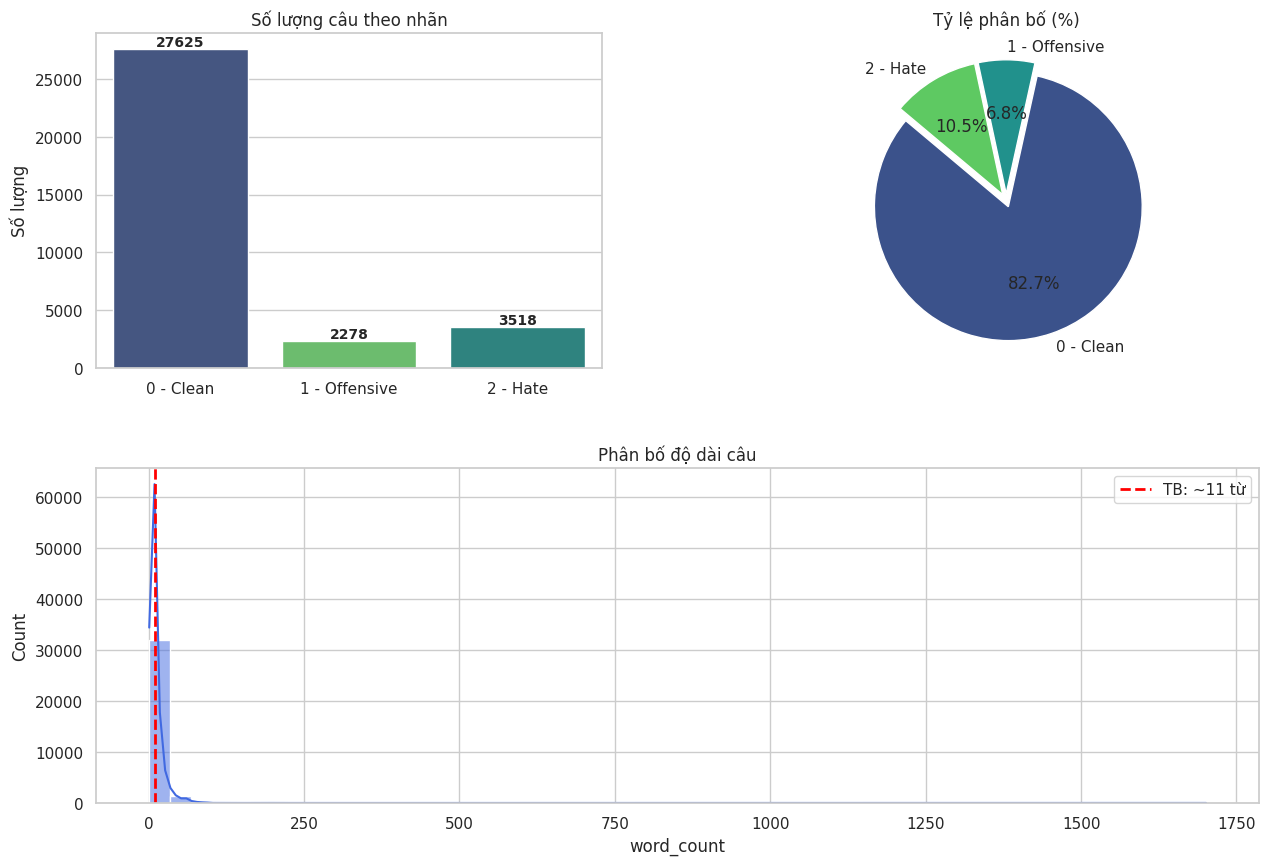

In [8]:
# ======================================================
# CELL 8: PHÂN TÍCH, TRỰC QUAN HÓA & NHẬN XÉT
# ======================================================

# 1. Đọc dữ liệu
df = pd.read_csv(DATASET_FILE)

# 2. Xử lý số liệu
df['word_count'] = df['free_text'].apply(lambda x: len(str(x).split()))

# --- SỬA ĐỔI: CHỈ LẤY PHẦN NGUYÊN (INT) ---
avg_length = int(df['word_count'].mean())

# Map nhãn và Sắp xếp
label_map = {0: '0 - Clean', 1: '1 - Offensive', 2: '2 - Hate'}
df['label_name'] = df['label_id'].map(label_map)
order_list = ['0 - Clean', '1 - Offensive', '2 - Hate']

# Đếm số lượng
label_counts = df['label_id'].value_counts().sort_index()

# 3. LOGIC TỰ ĐỘNG NHẬN XÉT
# --- Cân bằng dữ liệu ---
max_c = label_counts.max()
min_c = label_counts.min()
ratio = max_c / min_c if min_c > 0 else 0

balance_comment = ""
if ratio < 1.5:
    balance_comment = "✅ Dữ liệu KHÁ CÂN BẰNG. Tốt cho việc huấn luyện."
elif ratio < 3:
    balance_comment = "⚠️ Dữ liệu HƠI LỆCH (Imbalanced). Model có thể thiên vị nhãn nhiều hơn."
else:
    balance_comment = "❌ Dữ liệu MẤT CÂN BẰNG NGHIÊM TRỌNG. Cần cân nhắc kỹ thuật Oversampling."

# --- Độ dài câu ---
len_comment = ""
if avg_length < 5:
    len_comment = "Câu QUÁ NGẮN. Có thể thiếu ngữ cảnh."
elif 5 <= avg_length <= 20:
    len_comment = "✅ Độ dài PHÙ HỢP với đặc thù bình luận MXH."
else:
    len_comment = "Câu KHÁ DÀI so với bình luận thông thường."

# 4. In thông tin
print(f"📊 TỔNG QUAN DATASET:")
print(f"- Tổng số câu: {len(df):,}")
print(f"- Độ dài trung bình: ~{avg_length} từ/câu") # Đã hiển thị số nguyên
print("-" * 50)
print(f"NHẬN XÉT:")
print(f"1. {balance_comment}")
print(f"2. {len_comment}")
print("-" * 50)

# 5. Vẽ biểu đồ
fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(2, 2, wspace=0.3, hspace=0.3)

# --- Biểu đồ 1: Cột ---
ax1 = fig.add_subplot(grid[0, 0])
sns.countplot(x='label_name', hue='label_name', data=df, order=order_list, palette='viridis', legend=False, ax=ax1)

ax1.set_title('Số lượng câu theo nhãn')
ax1.set_xlabel('')
ax1.set_ylabel('Số lượng')
for p in ax1.patches:
    if p.get_height() > 0:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

# --- Biểu đồ 2: Tròn ---
ax2 = fig.add_subplot(grid[0, 1])
colors = sns.color_palette('viridis', 3)
ax2.pie(label_counts, labels=[label_map[i] for i in label_counts.index],
        autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05, 0.05, 0.05))
ax2.set_title('Tỷ lệ phân bố (%)')

# --- Biểu đồ 3: Histogram ---
ax3 = fig.add_subplot(grid[1, :])
sns.histplot(df['word_count'], bins=50, kde=True, color='royalblue', ax=ax3)
ax3.axvline(avg_length, color='red', linestyle='dashed', linewidth=2, label=f'TB: ~{avg_length} từ')
ax3.set_title('Phân bố độ dài câu')
ax3.legend()

plt.show()

In [9]:
# ======================================================
# CELL 9: PREPROCESSING & SPLIT DATA
# ======================================================

# 1. Áp dụng làm sạch dữ liệu
df['clean_text'] = df['free_text'].apply(lambda x: clean_text(str(x)))

# 2. Tokenizer
tokenizer = Tokenizer(num_words=MAX_WORDS, lower=True, split=' ')
tokenizer.fit_on_texts(df['clean_text']) # Fit trên cột đã làm sạch
word_index = tokenizer.word_index
print(f"   => Tìm thấy {len(word_index)} từ độc nhất trong từ điển.")

# 3. Chuyển văn bản sang chuỗi số (Sequence) & Padding
X = tokenizer.texts_to_sequences(df['clean_text'])
X = pad_sequences(X, maxlen=MAX_LEN)

# 4. Label Encoding (One-hot)
y = to_categorical(df['label_id'])

# 5. Chia tập Train/Test (80% Train - 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Dữ liệu sẵn sàng!")
print(f"   - Shape X_train: {X_train.shape}")
print(f"   - Shape y_train: {y_train.shape}")

   => Tìm thấy 11477 từ độc nhất trong từ điển.
✅ Dữ liệu sẵn sàng!
   - Shape X_train: (26736, 100)
   - Shape y_train: (26736, 3)


In [10]:
# ======================================================
# CELL 10: LOAD PRE-TRAINED EMBEDDING
# ======================================================

vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, EMBED_DIM))
hit = 0
miss = 0

print(f"🔄 Đang load vector từ {EMBEDDING_FILE}...")

try:
    with open(EMBEDDING_FILE, 'r', encoding='utf-8', errors='ignore') as f:
        # Bỏ qua dòng đầu tiên (chứa info file) nếu cần thiết
        first_line = f.readline()

        # Nếu dòng đầu chứa số lượng vector (thường ngắn), ta bỏ qua.
        # Nếu dòng đầu là vector luôn (dài), ta quay lại.
        if len(first_line.split()) > 2:
            f.seek(0)

        for line in f:
            values = line.rstrip().rsplit(' ')
            word = values[0]

            # --- KIỂM TRA AN TOÀN ---
            # Chỉ lấy dòng nào đủ 300 chiều + 1 từ = 301 phần tử
            if len(values) != EMBED_DIM + 1:
                continue

            if word in tokenizer.word_index:
                try:
                    idx = tokenizer.word_index[word]
                    coefs = np.asarray(values[1:], dtype='float32')
                    embedding_matrix[idx] = coefs
                    hit += 1
                except ValueError:
                    continue

    print(f"✅ Hoàn tất! Tìm thấy {hit} từ, không thấy {vocab_size - hit} từ.")

except FileNotFoundError:
    print("❌ LỖI: Không tìm thấy file embedding. Hãy kiểm tra lại đường dẫn!")

🔄 Đang load vector từ /content/drive/MyDrive/Project_HateSpeech/Embedding&Model/embedding/cc.vi.300.vec...
✅ Hoàn tất! Tìm thấy 9509 từ, không thấy 1969 từ.


In [11]:
# ======================================================
# CELL 11: BUILD MODEL, TRAIN & SAVE
# ======================================================

# 1. Định nghĩa Model
model = Sequential()
model.add(Input(shape=(MAX_LEN,)))

model.add(Embedding(vocab_size, EMBED_DIM, weights=[embedding_matrix], trainable=False))
model.add(SpatialDropout1D(0.3))

model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# 2. Compile
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

# 3. Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint(MODEL_FILE, monitor='val_loss', save_best_only=True)

# 4. Train
print("\n🚀 Bắt đầu huấn luyện...")
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, checkpoint],
    verbose=1 # verbose=1: Hiện thanh tiến trình (progress bar)
)

# 5. Lưu Tokenizer (Model đã được lưu tự động bởi checkpoint)
with open(TOKENIZER_FILE, 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print(f"\n✅ Đã lưu Model tại: {MODEL_FILE}")
print(f"✅ Đã lưu Tokenizer tại: {TOKENIZER_FILE}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 300)       │     3,443,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 100, 300)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 128)       │       186,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,634,507 (13.86 MB)

 Trainable params: 191,107 (746.51 KB)

 Non-trainable params: 3,443,400 (13.14 MB)


🚀 Bắt đầu huấn luyện...
Epoch 1/20
836/836 ━━━━━━━━━━━━━━━━━━━━ 171s 200ms/step - accuracy: 0.8231 - loss: 0.5798 - val_accuracy: 0.8420 - val_loss: 0.4262
Epoch 2/20
836/836 ━━━━━━━━━━━━━━━━━━━━ 206s 205ms/step - accuracy: 0.8428 - loss: 0.4411 - val_accuracy: 0.8509 - val_loss: 0.3923
Epoch 3/20
836/836 ━━━━━━━━━━━━━━━━━━━━ 196s 197ms/step - accuracy: 0.8427 - loss: 0.4150 - val_accuracy: 0.8549 - val_loss: 0.3803
Epoch 4/20
836/836 ━━━━━━━━━━━━━━━━━━━━ 171s 204ms/step - accuracy: 0.8481 - loss: 0.4047 - val_accuracy: 0.8672 - val_loss: 0.3652
Epoch 5/20
836/836 ━━━━━━━━━━━━━━━━━━━━ 163s 195ms/step - accuracy: 0.8522 - loss: 0.3922 - val_accuracy: 0.8690 - val_loss: 0.3589
Epoch 6/20
836/836 ━━━━━━━━━━━━━━━━━━━━ 213s 208ms/step - accuracy: 0.8557 - loss: 0.3781 - val_accuracy: 0.8682 - val_loss: 0.3624
Epoch 7/20
836/836 ━━━━━━━━━━━━━━━━━━━━ 193s 197ms/step - accuracy: 0.8614 - loss: 0.3721 - val_accuracy: 0.8714 - val_loss: 0.3513
Epoch 8/20
836/836 ━━━━━━━━━━━━━━━━━━━━ 169s 202ms/

In [12]:
# ======================================================
# CELL 12: CẬP NHẬT FILE KEYWORDS.JSON
# ======================================================
valid_keywords = {
  "Phân biệt vùng miền": [
    "bắc kỳ", "nam kỳ", "trung kỳ", "parky", "namiki", "hoa thanh que", "nhà quê", "tộc", "mọi miên", "bake", "narke"
  ],
  "Chính trị / Nhạy cảm": [
    "phản động", "cộng sản", "chế độ", "đu càng", "ba que", "tham nhũng", "dân chủ cuội", "bò đỏ", "cách mạng màu"
  ],
  "Kích động / Bạo lực": [
     "bắn bỏ", "giết", "chém", "tử hình", "đánh chết", "thủ tiêu", "xử bắn", "treo cổ", "băm vằm", "thanh trừng"
  ],
  "Cổ xúy / Xúi giục": {
    "Từ khóa cố định": [
        "tự tử đi", "tự sát đi", "nhảy cầu đi", "nhảy lầu đi", "reset kiếp sau"
    ],
    "Biến thể Regex (Ngắn gọn)": [
        r"(mày|m|bạn|con|thằng|nó)[ ]*chết[ ]*(đi|đê|liền|ngay)",
        r"chết[ ]*(đi|đê|liền|ngay|luôn)",
        r"reset[ ]*(game|server)[ ]*đi"
    ]
  },
  "Xúc phạm / Tục tĩu": {
    "Từ khóa cố định": [
      "ngu", "óc chó", "đồ chó", "chó đẻ", "chó chết",
      "súc vật", "cút xéo", "mẹ mày", "cặc", "lồn", "đéo", "đụ",
      "buồi", "cak", "kak", "đĩ", "điếm", "phò", "bitch", "cave",
      "dcmm", "đcmm", "vcl"
    ],
    "Biến thể Regex (Ngắn gọn)": [
      r"\bv[.,\s]*l\b",                       # vl
      r"\bc[.,\s]*m[.,\s]*(m|n)\b",           # cmm
      r"\b(đ|d)[.,\s]*(c|k)?[.,\s]*m+\b",     # dcm
      r"\bv[.,\s]*(l|c|k)+\b",                # vcl
      r"\b(c)?[.,\s]*m[.,\s]*m[.,\s]*b\b",    # cmmb
      r"\bb[.,\s]*m[.,\s]*g\b",               # bmg
      r"(đ|d)[.,\s]*é[.,\s]*o",               # đéo
      r"c[.,\s]*ặ[.,\s]*c"                    # cặc
    ]
  },
  "Miệt thị ngoại hình (Body Shaming)": [
      "béo như lợn", "mập như heo", "con heo mập", "xấu đau xấu đớn",
      "mặt lồn", "màn hình phẳng", "hai lưng"
  ],
  "Phân biệt giới tính": [
      "đồ đàn bà", "óc đàn bà", "tính đàn bà", "thứ đàn bà", "mấy con dẩm",
      "về rửa bát", "về hầu chồng", "máy đẻ"
  ],
  "Phân biệt tôn giáo": [
      "thợ tu", "sư hổ mang", "tà đạo", "buôn thần bán thánh", "con chiên ghẻ"
  ]
}

positive_keywords = [
    "đáng yêu", "dễ thương", "xinh gái", "đẹp trai", "ngoan",
    "tốt bụng", "hiền lành", "tuyệt vời", "xuất sắc", "thông minh",
    "yêu thế", "cưng xỉu", "cưng thế", "giỏi quá", "thương lắm",
    "xinh thế", "đẹp thế", "iu thế", "respect", "ngưỡng mộ", "ngọt ngào"
]

try:
    with open(KEYWORDS_FILE, 'w', encoding='utf-8') as f:
        json.dump(valid_keywords, f, ensure_ascii=False, indent=2)

    with open(WHITELIST_FILE, 'w', encoding='utf-8') as f:
        json.dump(positive_keywords, f, ensure_ascii=False, indent=2)

except Exception as e:
    print(f"❌ Lỗi: {e}")

In [13]:
# ======================================================
# CELL 13: RETRAIN SYSTEM
# ======================================================
def retrain_system():
    print("\n🔄 [SYSTEM] Đang tiến hành huấn luyện lại mô hình...")

    try:
        # 1. Load dữ liệu mới nhất
        if not os.path.exists(DATASET_FILE):
            print("❌ Không tìm thấy file dataset!")
            return

        df = pd.read_csv(DATASET_FILE)

        # Kiểm tra dữ liệu
        if len(df) < 10: # Ít nhất 10 dòng mới train
            print("⚠️ Dữ liệu quá ít để train lại.")
            return

        print(f"   - Tổng dữ liệu: {len(df)} dòng")

        # 2. Làm sạch dữ liệu (Pre-processing)
        # Lưu ý: Cột dữ liệu là 'free_text', nhãn là 'label_id'
        df = df.dropna(subset=['free_text', 'label_id']) # Bỏ dòng null

        # Áp dụng hàm clean_text từ Cell 4
        print("   - Đang làm sạch văn bản...")
        df['clean_text'] = df['free_text'].apply(lambda x: clean_text(str(x)))

        # 3. Chia tập train/test (80/20) để đánh giá sơ bộ
        X_train, X_test, y_train, y_test = train_test_split(
            df['clean_text'], df['label_id'], test_size=0.2, random_state=42
        )

        # 4. Vector hóa (TF-IDF)
        print("   - Đang Vector hóa dữ liệu...")
        # Tạo vectorizer mới (cập nhật từ vựng mới)
        vectorizer_new = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
        X_train_tfidf = vectorizer_new.fit_transform(X_train)
        X_test_tfidf = vectorizer_new.transform(X_test)

        # 5. Train Model (SVM)
        print("   - Đang Train Model (SVM)...")
        # Sử dụng SVC với class_weight='balanced' để cân bằng nếu dữ liệu lệch
        model_new = SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)
        model_new.fit(X_train_tfidf, y_train)

        # 6. Đánh giá sơ bộ
        y_pred = model_new.predict(X_test_tfidf)
        acc = accuracy_score(y_test, y_pred)
        print(f"✅ Huấn luyện xong! Độ chính xác mới: {acc:.2%}")
        # print(classification_report(y_test, y_pred)) # Bật nếu muốn xem chi tiết

        # 7. Lưu Model & Vectorizer
        print("   - Đang lưu file model...")
        joblib.dump(model_new, MODEL_FILE)
        joblib.dump(vectorizer_new, VECTORIZER_FILE)

        # 8. CẬP NHẬT BIẾN TOÀN CỤC (Để Web App dùng ngay lập tức)
        # Khai báo global để thay đổi biến bên ngoài hàm
        global model, vectorizer
        model = model_new
        vectorizer = vectorizer_new

        print("🚀 [SUCCESS] Hệ thống đã được cập nhật model mới thành công!")

    except Exception as e:
        print(f"❌ Lỗi khi Retrain: {e}")
        import traceback
        traceback.print_exc()

In [27]:
# ======================================================
# CELL 14: MANUAL MERGE
# ======================================================
def force_merge_and_retrain():
    print("⚡ BẮT ĐẦU: Quy trình gộp dữ liệu an toàn...")

    # 1. Kiểm tra file đầu vào
    if not os.path.exists(APPROVED_POOL_FILE):
        print("⚠️ File 'approved_pool.csv' không tồn tại. Không có gì để gộp.")
        return

    try:
        # 2. Đọc Dataset Chính và Pool Mới
        # Đọc dataset gốc (giả sử cột là: free_text, label_id)
        df_main = pd.read_csv(DATASET_FILE)

        # Đọc dữ liệu mới duyệt (thường cột là: text, label)
        df_pool = pd.read_csv(APPROVED_POOL_FILE)

        if df_pool.empty:
            print("⚠️ File pool rỗng.")
            return

        print(f"   - Dataset hiện tại: {len(df_main)} dòng")
        print(f"   - Dữ liệu mới duyệt: {len(df_pool)} dòng")

        # 3. CHUẨN HÓA TÊN CỘT (QUAN TRỌNG)
        # Đổi tên cột của pool cho khớp với dataset chính
        # (Chỉnh sửa map_columns nếu tên cột của bạn khác)
        map_columns = {
            'text': 'free_text',      # Tên bên pool -> Tên bên main
            'label': 'label_id'       # Tên bên pool -> Tên bên main
        }
        df_pool = df_pool.rename(columns=map_columns)

        # Chỉ lấy đúng các cột mà Dataset chính đang dùng
        cols_needed = [c for c in df_main.columns if c in df_pool.columns]
        df_pool_ready = df_pool[cols_needed]

        # 4. GỘP VÀ LOẠI BỎ TRÙNG LẶP
        # Nối 2 bảng lại
        df_combined = pd.concat([df_main, df_pool_ready], ignore_index=True)

        # Xóa các dòng trùng nhau (dựa trên cột văn bản)
        before_dedup = len(df_combined)
        df_combined = df_combined.drop_duplicates(subset=['free_text'], keep='last')
        after_dedup = len(df_combined)

        print(f"   - Tổng sau khi gộp: {before_dedup}")
        print(f"   - Sau khi lọc trùng: {after_dedup} (Đã loại {before_dedup - after_dedup} tin rác)")

        # 5. LƯU LẠI FILE CHÍNH
        df_combined.to_csv(DATASET_FILE, index=False, encoding='utf-8')
        print(f"✅ Đã lưu Dataset mới thành công!")

        # 6. DỌN DẸP & RETRAIN
        os.remove(APPROVED_POOL_FILE)
        print("🗑️ Đã xóa file pool tạm.")

        # Gọi hàm Retrain
        if 'retrain_system' in globals():
            print("🔄 Đang gọi hàm Retrain...")
            retrain_system()
        else:
            print("⚠️ CẢNH BÁO: Không tìm thấy hàm 'retrain_system'. Hãy chạy Cell chứa hàm Retrain trước!")

    except Exception as e:
        print(f"❌ Lỗi nghiêm trọng khi gộp dữ liệu: {e}")
        # In ra chi tiết lỗi để debug
        import traceback
        traceback.print_exc()

In [15]:
# ======================================================
# CELL 15: ACTIVE LEARNING
# ======================================================
import pandas as pd
import os

FEEDBACK_FILE = os.path.join(DIR_DATA, "user_feedback.csv")
APPROVED_POOL_FILE = os.path.join(DIR_DATA, "approved_pool.csv")

def is_spam_or_duplicate(text):
    """
    Trả về True nếu là Spam hoặc đã tồn tại.
    """
    # Text đầu vào đã được làm sạch ở hàm gọi, nhưng clean lại cho chắc
    text = str(text).strip()

    if not text: return True

    # 1. LỌC RÁC (SPAM FILTER)
    if len(text.split()) < 2:
        print(f"🚫 Từ chối (Quá ngắn): {text}")
        return True

    if len(text) > 15 and ' ' not in text:
        print(f"🚫 Từ chối (Spam ký tự): {text}")
        return True

    # 2. CHỐNG TRÙNG LẶP (DUPLICATE CHECK)
    # Kiểm tra trong Feedback
    if os.path.exists(FEEDBACK_FILE):
        try:
            df_fb = pd.read_csv(FEEDBACK_FILE)
            if text in df_fb['text'].values:
                print(f"🚫 Từ chối (Đã có trong Feedback): {text}")
                return True
        except: pass

    # Kiểm tra trong Pool
    if os.path.exists(APPROVED_POOL_FILE):
        try:
            df_pool = pd.read_csv(APPROVED_POOL_FILE)
            col_name = 'free_text' if 'free_text' in df_pool.columns else 'text'
            if text in df_pool[col_name].values:
                print(f"🚫 Từ chối (Đã có trong Pool): {text}")
                return True
        except: pass

    # Kiểm tra trong Dataset gốc
    if os.path.exists(DATASET_FILE):
        try:
            df_main = pd.read_csv(DATASET_FILE, usecols=['free_text'])
            if text in df_main['free_text'].values:
                print(f"🚫 Từ chối (Đã có trong Dataset): {text}")
                return True
        except: pass

    return False

def save_to_feedback_pool(original_text, predicted_label, user_status_text):
    """Lưu dữ liệu vào hồ sơ chờ duyệt"""

    # --- [QUAN TRỌNG] LÀM SẠCH TEXT TRƯỚC KHI LÀM BẤT CỨ GÌ ---
    # 1. Ép kiểu chuỗi
    clean_txt = str(original_text)
    # 2. Biến xuống dòng thành dấu cách (Chống lệch dòng CSV)
    clean_txt = clean_txt.replace('\n', ' ').replace('\r', ' ')
    # 3. Cắt khoảng trắng thừa đầu đuôi
    clean_txt = clean_txt.strip()
    # ----------------------------------------------------------

    # Kiểm tra Spam/Trùng lặp bằng text ĐÃ LÀM SẠCH
    if is_spam_or_duplicate(clean_txt):
        return False, "Dữ liệu bị loại bỏ do là Spam hoặc Trùng lặp."

    # Lưu vào DataFrame bằng text ĐÃ LÀM SẠCH (clean_txt)
    new_entry = pd.DataFrame([{
        'text': clean_txt,  # <--- Dùng clean_txt thay vì original_text
        'label': predicted_label,
        'user_status': user_status_text,
        'timestamp': pd.Timestamp.now()
    }])

    if not os.path.exists(FEEDBACK_FILE):
        new_entry.to_csv(FEEDBACK_FILE, index=False, encoding='utf-8')
    else:
        new_entry.to_csv(FEEDBACK_FILE, mode='a', header=False, index=False, encoding='utf-8')

    return True, "Đã gửi báo cáo cho Admin!"

def delete_feedback(idx):
    if os.path.exists(FEEDBACK_FILE):
        try:
            df_fb = pd.read_csv(FEEDBACK_FILE)
            if 0 <= idx < len(df_fb):
                df_fb = df_fb.drop(idx).reset_index(drop=True)
                df_fb.to_csv(FEEDBACK_FILE, index=False, encoding='utf-8')
                return True
        except: return False
    return False

def check_and_trigger_retrain():
    """Kiểm tra nếu đủ 100 câu đã duyệt thì gộp vào dataset chính và retrain"""
    if not os.path.exists(APPROVED_POOL_FILE): return

    try:
        df_pool = pd.read_csv(APPROVED_POOL_FILE)
        if len(df_pool) >= 100:
            print(f"🚀 Đã đạt ngưỡng {len(df_pool)} câu. Kích hoạt Retrain...")

            # Gọi hàm gộp an toàn ở Cell 10 (nếu có)
            if 'force_merge_and_retrain' in globals():
                force_merge_and_retrain()
            else:
                # Fallback nếu chưa chạy Cell 10
                print("⚠️ Không tìm thấy hàm merge an toàn.")
        else:
            print(f"📊 Tiến độ: {len(df_pool)}/100 câu.")
    except Exception as e:
        print(f"⚠️ Lỗi check retrain: {e}")

def move_to_official_dataset(text, final_label):
    # Text input ở đây lấy từ file Feedback nên đã sạch, nhưng clean lại cho chắc
    text = str(text).replace('\n', ' ').strip()

    # 1. Thêm vào Approved Pool
    # Lưu ý: Cột dataset chính là 'free_text' và 'label_id'
    new_data = pd.DataFrame([[text, final_label]], columns=['free_text', 'label_id'])

    if not os.path.exists(APPROVED_POOL_FILE):
        new_data.to_csv(APPROVED_POOL_FILE, index=False, encoding='utf-8')
    else:
        new_data.to_csv(APPROVED_POOL_FILE, mode='a', header=False, index=False, encoding='utf-8')

    # 2. Xóa câu đó khỏi file Feedback
    if os.path.exists(FEEDBACK_FILE):
        df_fb = pd.read_csv(FEEDBACK_FILE)
        df_fb = df_fb[df_fb['text'] != text]
        df_fb.to_csv(FEEDBACK_FILE, index=False, encoding='utf-8')

    check_and_trigger_retrain()
    return True

In [24]:
# ======================================================
# CELL 16: WEB APP
# ======================================================
# 1. Cấu hình
NGROK_TOKEN = "38X6u0T1oxZDfbGh72P9CiufrZI_B8ewqZRth5WaHa4KdT88"
ADMIN_PASSWORD = "admin123"
SECRET_KEY = "khoa_bi_mat_cho_session"

# Setup Ngrok
ngrok.set_auth_token(NGROK_TOKEN)
ngrok.kill()

# --- HÀM BỔ TRỢ ---
def app_clean_text(text):
    if 'clean_text' in globals(): return clean_text(text)
    return re.sub(r'[^\w\s]', ' ', str(text).lower())

def app_check_english(text):
    if 'scan_english_offensive' in globals(): return scan_english_offensive(text)
    return False, 0, None

def check_violation_vietnamese(text):
    cleaned = app_clean_text(text)
    detected = []
    if 'KEYWORDS' in globals():
        for category, content in KEYWORDS.items():
            is_violated = False
            if isinstance(content, list):
                for word in content:
                    if word in cleaned: is_violated = True; break
            elif isinstance(content, dict) and "Từ khóa cố định" in content:
                for word in content["Từ khóa cố định"]:
                    if word in cleaned: is_violated = True; break
            if is_violated: detected.append(category)
    return list(set(detected)), cleaned

# --- FLASK APP ---
app = Flask(__name__)
app.secret_key = SECRET_KEY

HTML_TEMPLATE = """
<!DOCTYPE html>
<html>
<head>
    <title>Hệ thống kiểm duyệt Tiếng Việt</title>
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <style>
        body { font-family: 'Segoe UI', sans-serif; background: #f8fafc; padding: 20px; }
        .container { max-width: 950px; margin: 0 auto; background: white; padding: 30px; border-radius: 15px; box-shadow: 0 10px 25px rgba(0,0,0,0.05); }
        h2 { text-align: center; color: #1e293b; margin-bottom: 25px; }
        textarea { width: 100%; height: 120px; padding: 15px; border: 2px solid #e2e8f0; border-radius: 10px; font-size: 16px; box-sizing: border-box; transition: 0.3s; }
        textarea:focus { border-color: #3b82f6; outline: none; }

        .btn { display: block; width: 100%; padding: 12px; border: none; border-radius: 8px; font-size: 16px; font-weight: bold; cursor: pointer; transition: 0.2s; text-align: center; text-decoration: none; box-sizing: border-box;}
        .btn-check { background: #3b82f6; color: white; margin-top: 15px; }
        .btn-check:hover { background: #2563eb; }

        .result-box { margin-top: 25px; padding: 20px; border-radius: 10px; text-align: center; border: 2px solid transparent; animation: fadeIn 0.5s; }
        .SAFE { background: #dcfce7; color: #15803d; border-color: #86efac; }
        .WARNING { background: #ffedd5; color: #c2410c; border-color: #fdba74; }
        .DANGER { background: #fee2e2; color: #b91c1c; border-color: #fca5a5; }

        .admin-link { display: block; text-align: center; margin-top: 30px; color: #94a3b8; text-decoration: none; font-size: 14px; }

        /* Admin Styles */
        table { width: 100%; border-collapse: collapse; margin-top: 20px; font-size: 14px; }
        th { background: #f1f5f9; padding: 12px; text-align: left; color: #475569; }
        td { border-bottom: 1px solid #e2e8f0; padding: 12px; vertical-align: top; }

        /* Action Buttons */
        .act-btn { padding: 5px 10px; border-radius: 5px; text-decoration: none; font-size: 11px; margin-right: 3px; display: inline-block; color: white; font-weight: bold;}
        .act-clean { background: #22c55e; }
        .act-offen { background: #f59e0b; }
        .act-hate { background: #ef4444; }
        .act-del { color: #64748b; font-size: 12px; margin-left: 5px; text-decoration: underline;}

        /* Tags for Admin */
        .tag { font-size: 11px; padding: 3px 8px; border-radius: 10px; font-weight: bold; display: inline-block; }
        .tag-safe { background: #dcfce7; color: #166534; border: 1px solid #86efac; }
        .tag-warn { background: #ffedd5; color: #9a3412; border: 1px solid #fdba74; }
        .tag-hate { background: #fee2e2; color: #991b1b; border: 1px solid #fca5a5; }

        /* --- MONKEY LOGIN STYLES --- */
        .monkey-icon { font-size: 60px; text-align: center; margin-bottom: 10px; cursor: pointer; transition: transform 0.2s; display: block; }
        .monkey-icon:hover { transform: scale(1.1); }

        .password-wrapper { position: relative; margin-bottom: 15px; }
        .password-wrapper input { width: 100%; padding: 12px; border: 1px solid #ccc; border-radius: 8px; box-sizing: border-box; font-size: 16px; }
        .toggle-icon { position: absolute; right: 15px; top: 50%; transform: translateY(-50%); cursor: pointer; font-size: 18px; user-select: none; z-index: 2; }

        @keyframes fadeIn { from { opacity: 0; transform: translateY(10px); } to { opacity: 1; transform: translateY(0); } }
    </style>
</head>
<body>
    <div class="container">
        {% if page == 'home' %}
            <h2>🛡️ Kiểm duyệt Nội dung Tiếng Việt</h2>
            <form method="post">
                <textarea name="txt" placeholder="Nhập bình luận của bạn tại đây...">{{original}}</textarea>
                <button type="submit" class="btn btn-check">KIỂM TRA NGAY</button>
            </form>
            {% if res %}
                <div class="result-box {{status}}">
                    <h3 style="margin:0; font-size: 22px;">{{res}}</h3>
                    {% if debug %}<p style="margin-top:10px; font-size:13px; opacity:0.8;">(AI đã xử lý: "{{debug}}")</p>{% endif %}

                    <div style="margin-top: 15px;">
                        <button style="background:none; border:none; text-decoration:underline; cursor:pointer; color:inherit; font-size:13px;"
                                onclick="reportError('{{status}}', {{pred_id}})">📢 Báo cáo kết quả sai</button>
                    </div>
                </div>
            {% endif %}
            <a href="/admin" class="admin-link">Khu vực quản trị viên</a>

        {% elif page == 'login' %}
            <div id="monkey" class="monkey-icon">🙈</div>

            <h2>🔐 Đăng nhập Admin</h2>
            <form method="post">
                <div class="password-wrapper">
                    <input type="password" id="passwordInput" name="password" placeholder="Mật khẩu">
                    <span class="toggle-icon" onclick="togglePassword()">👁️</span>
                </div>
                <button type="submit" class="btn btn-check">Đăng nhập</button>
            </form>
            {% if error %}<p style="color:red; text-align:center; margin-top:10px">{{error}}</p>{% endif %}

        {% elif page == 'admin' %}
            <h2>⚙️ Quản Lý Phản Hồi</h2>
            <div style="text-align:right"><a href="/logout" style="color:red; text-decoration:none">Đăng xuất</a></div>
            {% if feedbacks.empty %}
                <p style="text-align:center; color:#64748b; margin-top:30px">Hiện chưa có phản hồi nào.</p>
            {% else %}
                <table>
                    <thead>
                        <tr>
                            <th style="width:45%">Nội dung người dùng</th>
                            <th style="width:20%">AI Dự đoán gốc</th>
                            <th>Chọn nhãn chính xác</th>
                        </tr>
                    </thead>
                    <tbody>
                    {% for idx, row in feedbacks.iterrows() %}
                        <tr>
                            <td>{{ row['text'] }}</td>

                            <td>
                                {% if row['label'] == 0 %}
                                    <span class="tag tag-safe">Clean</span>
                                {% elif row['label'] == 1 %}
                                    <span class="tag tag-warn">Offensive</span>
                                {% else %}
                                    <span class="tag tag-hate">Hate</span>
                                {% endif %}
                            </td>

                            <td>
                                <div style="margin-bottom:5px; font-size:11px; color:#64748b">Duyệt là:</div>
                                <a href="/approve?idx={{idx}}&label=0" class="act-btn act-clean">Clean</a>
                                <a href="/approve?idx={{idx}}&label=1" class="act-btn act-offen">Offensive</a>
                                <a href="/approve?idx={{idx}}&label=2" class="act-btn act-hate">Hate</a>
                                <br>
                                <a href="/delete?idx={{idx}}" class="act-del">🗑️ Xóa rác</a>
                            </td>
                        </tr>
                    {% endfor %}
                    </tbody>
                </table>
            {% endif %}
        {% endif %}
    </div>
    <script>
        function reportError(ai_status, pred_id) {
            var txt = document.querySelector("textarea").value;
            var statusMsg = "Báo lỗi (" + ai_status + ")";

            fetch('/send-feedback', {
                method: 'POST',
                headers: {'Content-Type': 'application/json'},
                body: JSON.stringify({
                    text: txt,
                    label: pred_id,
                    user_status: statusMsg
                })
            }).then(() => alert("✅ Đã gửi báo cáo! Cảm ơn bạn đã đóng góp."));
        }

        // --- MONKEY LOGIN SCRIPT ---
        function togglePassword() {
            var pInput = document.getElementById("passwordInput");
            var mIcon = document.getElementById("monkey");
            if (pInput.type === "password") {
                pInput.type = "text";
                if(mIcon) mIcon.innerText = "🐵"; // Mở mắt
            } else {
                pInput.type = "password";
                if(mIcon) mIcon.innerText = "🙈"; // Che mắt
            }
        }

        // Tự động che mắt khi click vào ô input (nếu đang ở mode password)
        var pInput = document.getElementById("passwordInput");
        if(pInput) {
            pInput.addEventListener('focus', function() {
                var mIcon = document.getElementById("monkey");
                if (this.type === "password" && mIcon) mIcon.innerText = "🙈";
            });
        }
    </script>
</body>
</html>
"""

# --- LOGIC XỬ LÝ CHÍNH ---
@app.route('/', methods=['GET', 'POST'])
def index():
    res, status, debug, original, pred_id = "", "", "", "", 0
    if request.method == 'POST':
        try:
            original = request.form['txt']
            if not original.strip():
                return render_template_string(HTML_TEMPLATE, page='home', res="Vui lòng nhập nội dung!", status="WARNING")

            is_eng_bad, eng_label, eng_word = app_check_english(original)

            cleaned = app_clean_text(original)
            debug = cleaned
            violation_list, _ = check_violation_vietnamese(original)

            seq = tokenizer.texts_to_sequences([cleaned])
            pad = pad_sequences(seq, maxlen=MAX_LEN, padding='post', truncating='post')
            ai_pred = model.predict(pad, verbose=0)
            pred_id = int(np.argmax(ai_pred))

            CRITICAL = ["Chính trị / Nhạy cảm", "Kích động / Bạo lực", "Cổ xúy / Xúi giục"]
            has_critical = any(err in violation_list for err in CRITICAL)

            if has_critical:
                status = "DANGER"; res = f"🚫 VI PHẠM NGHIÊM TRỌNG: {', '.join(violation_list)}"
            elif is_eng_bad:
                status = "WARNING"; res = f"⚠️ TỪ NHẠY CẢM (Tiếng Anh): '{eng_word}'"; pred_id = 1
            elif violation_list:
                status = "WARNING"; res = f"⚠️ TỪ KHÓA NHẠY CẢM: {', '.join(violation_list)}"
            elif pred_id == 2:
                status = "DANGER"; res = "🚫 NGÔN TỪ THÙ GHÉT"
            elif pred_id == 1:
                status = "WARNING"; res = "⚠️ NỘI DUNG XÚC PHẠM"
            else:
                status = "SAFE"; res = "✅ NỘI DUNG SẠCH"

        except Exception as e:
            status = "DANGER"; res = f"Lỗi hệ thống: {e}"

    return render_template_string(HTML_TEMPLATE, page='home', res=res, status=status, debug=debug, original=original, feedbacks=pd.DataFrame(), pred_id=pred_id)

@app.route('/send-feedback', methods=['POST'])
def handle_feedback():
    data = request.json
    if 'save_to_feedback_pool' in globals():
        save_to_feedback_pool(data['text'], data.get('label', 0), data.get('user_status', 'REPORT'))
    return jsonify({"status": "ok"})

@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        if request.form['password'] == ADMIN_PASSWORD:
            session['logged_in'] = True
            return redirect(url_for('admin_view'))
        return render_template_string(HTML_TEMPLATE, page='login', error="Sai mật khẩu")
    return render_template_string(HTML_TEMPLATE, page='login')

@app.route('/admin')
def admin_view():
    if not session.get('logged_in'): return redirect(url_for('login'))
    df_fb = pd.DataFrame()
    if 'FEEDBACK_FILE' in globals() and os.path.exists(FEEDBACK_FILE):
        try: df_fb = pd.read_csv(FEEDBACK_FILE)
        except: pass
    return render_template_string(HTML_TEMPLATE, page='admin', feedbacks=df_fb)

@app.route('/approve')
def approve():
    if not session.get('logged_in'): return redirect(url_for('login'))
    idx = int(request.args.get('idx'))
    label = int(request.args.get('label'))
    if 'move_to_official_dataset' in globals() and 'FEEDBACK_FILE' in globals():
        try:
            df_fb = pd.read_csv(FEEDBACK_FILE)
            move_to_official_dataset(df_fb.iloc[idx]['text'], label)
        except: pass
    return redirect(url_for('admin_view'))

@app.route('/delete')
def delete():
    if not session.get('logged_in'): return redirect(url_for('login'))
    idx = int(request.args.get('idx'))
    if 'delete_feedback' in globals(): delete_feedback(idx)
    return redirect(url_for('admin_view'))

@app.route('/logout')
def logout():
    session.pop('logged_in', None)
    return redirect(url_for('login'))

try: ngrok.kill()
except: pass

try:
    public_url = ngrok.connect(5000).public_url
    print("="*60)
    print(f"👉 TRANG NGƯỜI DÙNG: {public_url}")
    print(f"🔐 TRANG QUẢN TRỊ:   {public_url}/admin")
    print("="*60)
    app.run(port=5000, debug=False)
except Exception as e:
    print(f"❌ Lỗi: {e}")

👉 TRANG NGƯỜI DÙNG: https://reggie-nonobservable-delmar.ngrok-free.dev
🔐 TRANG QUẢN TRỊ:   https://reggie-nonobservable-delmar.ngrok-free.dev/admin
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [22/Jan/2026 10:39:56] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Jan/2026 10:39:58] "GET /login HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Jan/2026 10:40:23] "POST /login HTTP/1.1" 302 -
INFO:werkzeug:127.0.0.1 - - [22/Jan/2026 10:40:24] "GET /admin HTTP/1.1" 200 -
